In [1]:
import sys
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
dataroot = '../SD_1D_cases'
filename = 'Argo_along_SD.mat'

In [3]:
dat = sio.loadmat(os.path.join(dataroot, filename))

In [4]:
dat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Oct 13 11:55:25 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Argo_along_SD': array([[(array([[-51.74706   , -58.90377   , -59.491     , -53.25525   ,
                 -53.136     , -58.53671   , -50.698     , -53.18731   ,
                 -53.27403597, -59.73      , -52.285     , -53.2078    ,
                 -60.499     , -53.12722   , -54.164     , -52.96056   ,
                 -50.58650167, -55.533     , -58.35      , -58.639     ,
                 -52.27102   , -52.71153   , -52.42475   , -59.578     ,
                 -60.3       , -52.57976   , -53.2618    , -53.078     ,
                 -53.66      , -54.20901   , -52.969     , -51.54492   ,
                 -54.065     , -52.73430698, -52.759     , -59.835     ,
                 -58.23296333, -51.234     , -59.442     , -53.59607349,
                 -53.673     , -58.813     , -52.371     , -60.365     ,
                 -52.502     , -60.046   

In [5]:
argo_indices = {
    'C1': 35,
    'C4': 49,
    'C5': 25,
    'C6': 85,
    'C7': 19,
    'C8': 24,
    'P1': 41,
    'P2': 41,
    'P3': 66,
    'P4': 9,
    'P5': 30,
    'P6': 44,
    'P7': 44,
    'P8': 19,
    }
argo_dates = {
    'C1': 33,
    'C4': 47,
    'C5': 52,
    'C6': 55,
    'C7': 62,
    'C8': 69,
    'P1': 34,
    'P2': 36,
    'P3': 40,
    'P4': 41,
    'P5': 43,
    'P6': 52,
    'P7': 54,
    'P8': 58,
    }
year = 2019
argo_dttime = {}
for key in argo_dates.keys():
    dttime_pfl = [pd.to_datetime(year*1000 + argo_dates[key], format='%Y%j')]
    argo_dttime[key] = dttime_pfl

In [6]:
argo_dttime

{'C1': [Timestamp('2019-02-02 00:00:00')],
 'C4': [Timestamp('2019-02-16 00:00:00')],
 'C5': [Timestamp('2019-02-21 00:00:00')],
 'C6': [Timestamp('2019-02-24 00:00:00')],
 'C7': [Timestamp('2019-03-03 00:00:00')],
 'C8': [Timestamp('2019-03-10 00:00:00')],
 'P1': [Timestamp('2019-02-03 00:00:00')],
 'P2': [Timestamp('2019-02-05 00:00:00')],
 'P3': [Timestamp('2019-02-09 00:00:00')],
 'P4': [Timestamp('2019-02-10 00:00:00')],
 'P5': [Timestamp('2019-02-12 00:00:00')],
 'P6': [Timestamp('2019-02-21 00:00:00')],
 'P7': [Timestamp('2019-02-23 00:00:00')],
 'P8': [Timestamp('2019-02-27 00:00:00')]}

In [7]:
argo_dttime['C1'][0].strftime('%Y-%m-%d %H:%M:%S')

'2019-02-02 00:00:00'

In [8]:
lat  = dat['Argo_along_SD'][0,0]['lat']
lon  = dat['Argo_along_SD'][0,0]['lon']
pre  = dat['Argo_along_SD'][0,0]['pre']
temp = dat['Argo_along_SD'][0,0]['temp']
salt = dat['Argo_along_SD'][0,0]['sal']

(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)
(500,)
(1, 500)
(1, 500)


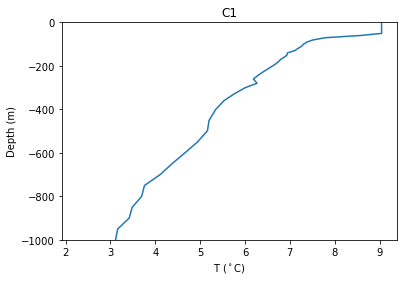

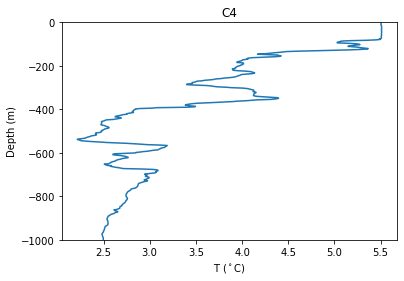

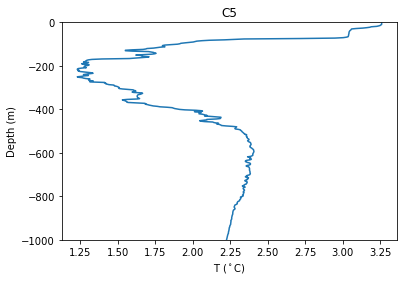

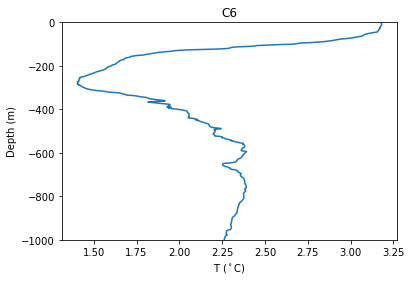

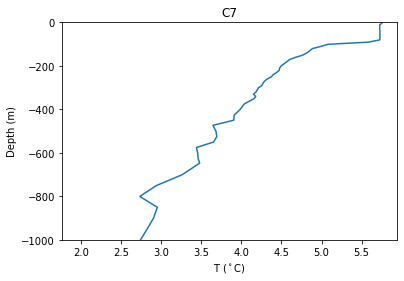

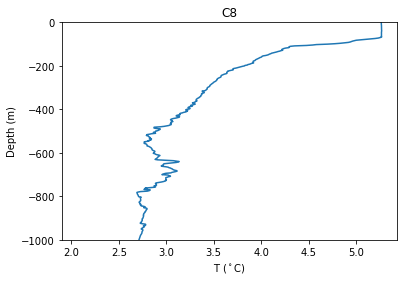

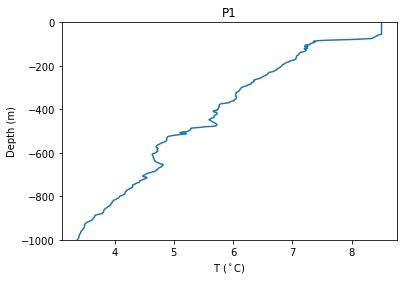

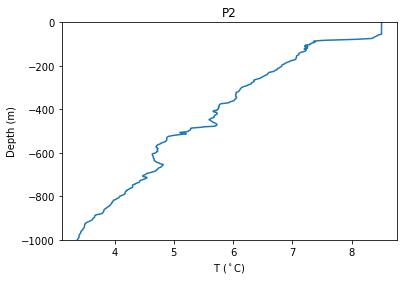

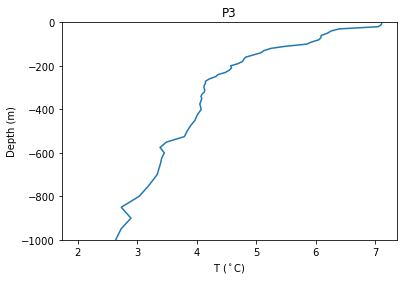

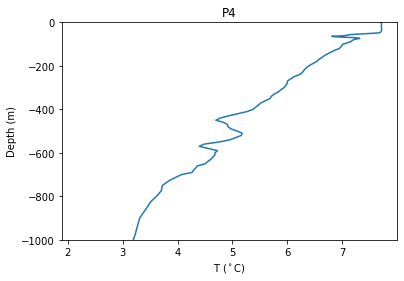

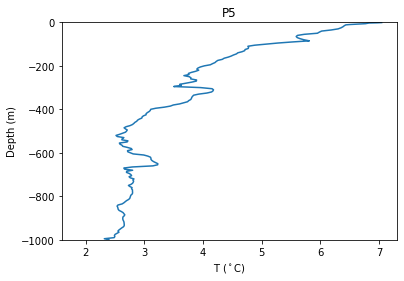

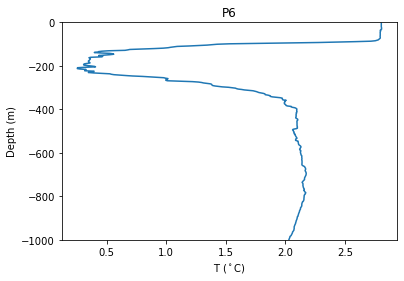

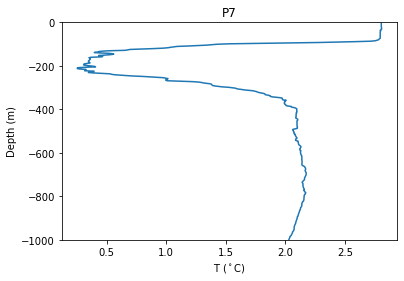

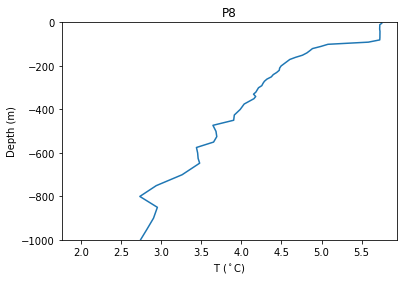

In [9]:
nzmax = 500
for key in argo_indices.keys():
    idx = argo_indices[key]-1 
    z1 = pre[:nzmax,idx].squeeze()
    t1 = temp[:nzmax,idx:idx+1].transpose()
    s1 = salt[:nzmax,idx:idx+1].transpose()
    print(z1.shape)
    print(t1.shape)
    print(s1.shape)
    dat_dump_pfl(argo_dttime[key], z1, [t1], os.path.join(dataroot, 't_prof_{}.dat'.format(key)), skip_value=np.nan)
    dat_dump_pfl(argo_dttime[key], z1, [s1], os.path.join(dataroot, 's_prof_{}.dat'.format(key)), skip_value=np.nan)
    fig = plt.figure()
    plt.plot(t1.squeeze(), z1)
    plt.title(key)
    plt.xlabel('T ($^\circ$C)')
    plt.ylabel('Depth (m)')
    plt.ylim([-1000, 0])